In [1]:
# import libraries

import pandas as pd 
import numpy as np 
import numpy.random as npr
import math
import numpy.matlib

import matplotlib.pyplot as plt
from sklearn import metrics

import time

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


In [2]:
general_acc = []
general_time = []

scalable_acc = []
scalable_time = []

In [3]:
def general_spectral_clustering():
    start_time = time.time()
    # number of points per line
    n1 = 1000
    # number of clusters
    k = 3  
    # level of noise
    noise_level = 0.25

    # Generate DataSet 
    x = np.linspace(1, 10, n1)[:, np.newaxis]
    X = np.concatenate((x, 3*x), axis=1)
    X = np.concatenate((X, np.concatenate((x, x), axis=1)), axis=0)
    X = np.concatenate((X, np.concatenate((x, 0.1*x), axis=1)), axis=0)

    # Generate Noise 
    n = 3 * n1

    noise = npr.randn(n, 2) * noise_level

    X += noise
    X[X < 0] = 0

    # true levels [1 to 3]
    truelabels = np.repeat(np.arange(1, k+1), n1)
    
    X_norm = X / np.sqrt(np.sum(X**2, axis=1))[:, np.newaxis]
    I = np.eye(n)
    W = X_norm @ X_norm.T 
    
    np.fill_diagonal(W, 0) # set the diagonal to 0
    W = W**6    # to enlarge the difference 
    d = np.sum(W, axis=1) # get the row sum 
    
    d_sqrt_inv = 1 / np.sqrt(d)
    transfer_d_sqrt_inv = np.tile(d_sqrt_inv.sum(axis=0), (d_sqrt_inv.shape[0],1))
    tilde_W = np.matlib.repmat(transfer_d_sqrt_inv, 1, n) * W * np.matlib.repmat(transfer_d_sqrt_inv.T, n,1)
    tilde_W = ( tilde_W + tilde_W.T )/2
    
    tilde_L = np.eye(n) - tilde_W
    tilde_lambda, tilde_u = np.linalg.eigh(tilde_L)
    
    sorted_indices = tilde_lambda.argsort()[:k]
    tilde_lambda = tilde_lambda[sorted_indices]
    tilde_u = tilde_u[:, sorted_indices]
    
    ## Apply k-means clustering on the transformed data
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tilde_u)
    labels_pred = kmeans.predict(tilde_u)
    
    pred_labels = labels_pred.copy()
    pred_labels[pred_labels == 0] = truelabels[pred_labels == 0]
    pred_labels[pred_labels == 1] = truelabels[pred_labels == 1]
    pred_labels[pred_labels == 2] = truelabels[pred_labels == 2]
    
    accuracy = accuracy_score(truelabels, pred_labels)
    end_time = time.time()
    my_time = end_time - start_time
    return accuracy, my_time

In [4]:
def scalable_spectral_clustering():
    start_time = time.time()
    # number of points per line
    n1 = 1000
    # number of clusters
    k = 3  
    # level of noise
    noise_level = 0.25

    # Generate DataSet 
    x = np.linspace(1, 10, n1)[:, np.newaxis]
    X = np.concatenate((x, 3*x), axis=1)
    X = np.concatenate((X, np.concatenate((x, x), axis=1)), axis=0)
    X = np.concatenate((X, np.concatenate((x, 0.1*x), axis=1)), axis=0)
    
    n = 3 * n1

    noise = npr.randn(n, 2) * noise_level

    X += noise
    X[X < 0] = 0

    # true levels [1 to 3]
    truelabels = np.repeat(np.arange(1, k+1), n1)

    # Normalize Data X 
    X_norm = X / np.sqrt(np.sum(X**2, axis=1))[:, np.newaxis]
    
    # create one_vec 
    vec1 = np.ones((3000, 2))

    # get d_vec 
    d_vec = X @ (X.T @ vec1) - vec1 
    D_sqrt_inv = 1 / np.sqrt(d_vec)
    tilde_X = D_sqrt_inv *X
    tilde_U, S, Vt = np.linalg.svd(tilde_X)
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tilde_U)
    
    labels_pred = kmeans.predict(tilde_U)

    pred_labels = labels_pred.copy()

    pred_labels[pred_labels == 0] = truelabels[pred_labels == 0]
    pred_labels[pred_labels == 1] = truelabels[pred_labels == 1]
    pred_labels[pred_labels == 2] = truelabels[pred_labels == 2]

    # Compute accuracy score
    accuracy = accuracy_score(truelabels, pred_labels)
    
    end_time = time.time()
    my_time = end_time - start_time
    return accuracy, my_time

In [5]:
for i in range(100):
    a1, t1 = general_spectral_clustering()
    general_acc.append(a1)
    general_time.append(t1)
    
    a2, t2 = scalable_spectral_clustering()
    scalable_acc.append(a2)
    scalable_time.append(t2)

/Users/joellecho/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joellecho/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joellecho/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/joellecho/opt/anaconda3/envs/tf2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

In [6]:
print("length of list (a1,t1,a2,t2): {},{},{},{}".format(len(general_acc), len(general_time), len(scalable_acc), len(scalable_time)))
#print("average accuracy of each clustering is; {},{}".format(avg_a1, avg_a2))
avg_a1 = np.mean(general_acc)
avg_t1 = np.mean(general_time)

avg_a2 = np.mean(scalable_acc)
avg_t2 = np.mean(scalable_time)
#print("average accuracy of each clustering is; {},{}".format(avg_a1, avg_a2))

length of list (a1,t1,a2,t2): 100,100,100,100


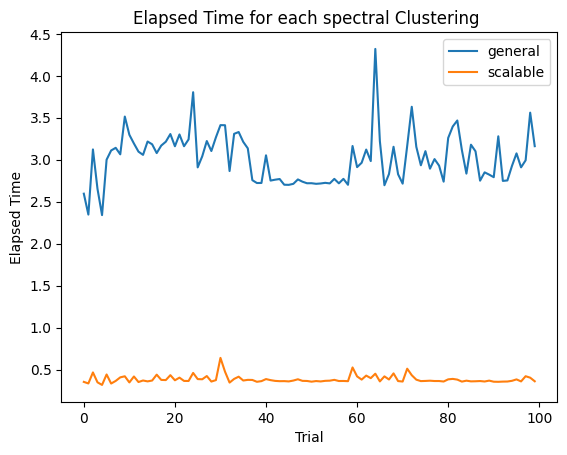

In [7]:
plt.plot(general_time)
plt.plot(scalable_time)

plt.legend(['general', 'scalable'])
plt.title('Elapsed Time for each spectral Clustering ')
plt.xlabel('Trial')
plt.ylabel('Elapsed Time')
plt.show()

Text(0.5, 1.0, 'Scalable SC Elapsed Time ')

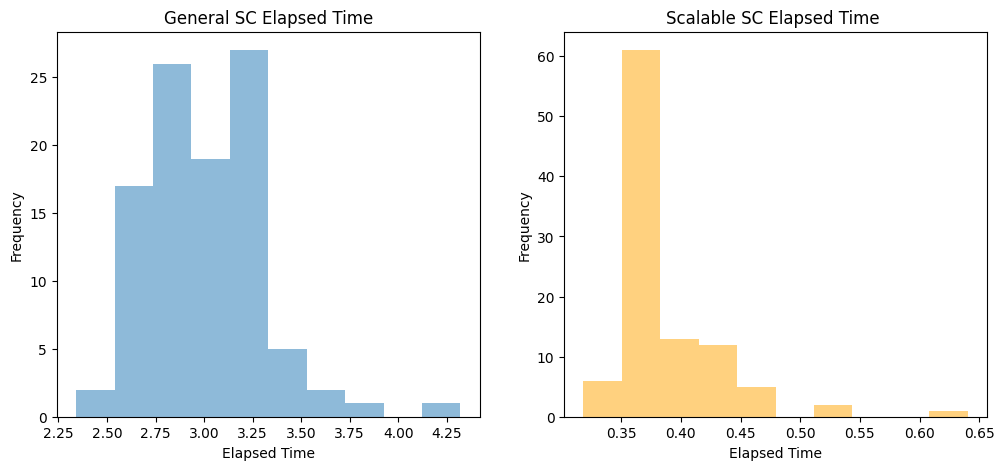

In [8]:
fig, axs = plt.subplots(1,2, figsize = (12,5)) 

axs[0].hist(general_time, alpha = 0.5)
axs[0].set_xlabel("Elapsed Time")
axs[0].set_ylabel("Frequency")
axs[0].set_title("General SC Elapsed Time")

axs[1].hist(scalable_time, alpha = 0.5, color = 'orange')
axs[1].set_xlabel("Elapsed Time")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Scalable SC Elapsed Time ")




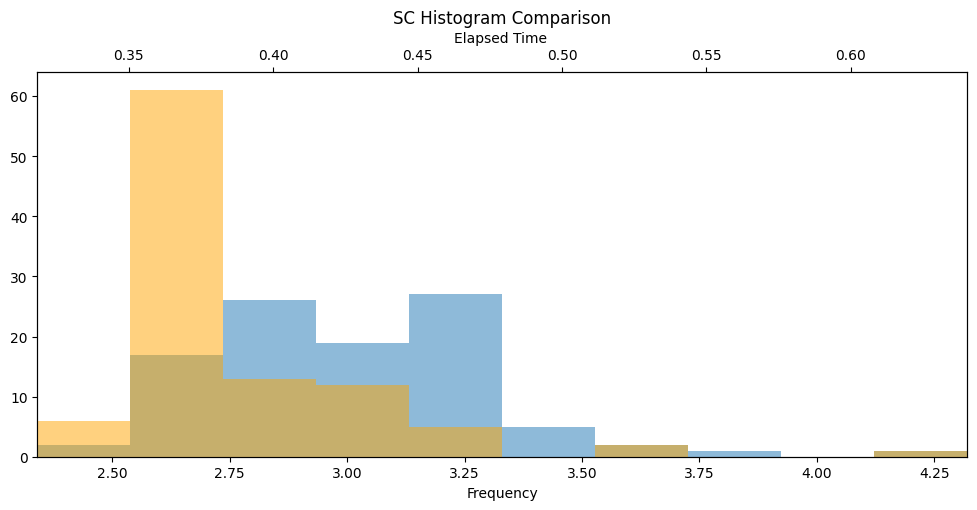

In [9]:
# Create a figure and the first axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot a histogram of data1 on the first axis
ax1.hist(general_time,alpha = 0.5)
# Set the title and xlabel for the first axis
ax1.set_title('SC Histogram Comparison')
ax1.set_xlabel('Frequency')

ax2 = ax1.twiny() # Create the second axis with the same y-axis as the first axis

# Plot a histogram of data2 on the second axis
ax2.hist(scalable_time, color='orange', alpha=0.5)

# Set the xlabel for the second axis
ax2.set_xlabel('Elapsed Time ')

# Set the x-limits for both axes
ax1.set_xlim(min(general_time), max(general_time))
ax2.set_xlim(min(scalable_time), max(scalable_time))

# Display the plot
plt.show()
